In [1]:
import numpy as np
import XNLdyn
import matplotlib.pyplot as plt
import multiprocessing as mp
from multiprocessing import Pool

%matplotlib notebook

In [2]:
import warnings
warnings.filterwarnings('default')

In [3]:

## Set up the problem
PAR = XNLdyn.XNLpars()

N_local_fluences_to_calculate = 30
N_pulse_energies = 20
Nsteps_r = 100

pulse_energy_J = 1e-12 # J

PAR.I0 =  [XNLdyn.photons_per_J(PAR.E_i[0])*pulse_energy_J,]
PAR.I0

[7300.010613404401]

Starting to generate lookup tables for U between -25.0 to 25.0 and R between 0.0 and 20.0
Lookup tables generated.
Saving at ./fermi_lookup_table.npz


<IPython.core.display.Javascript object>


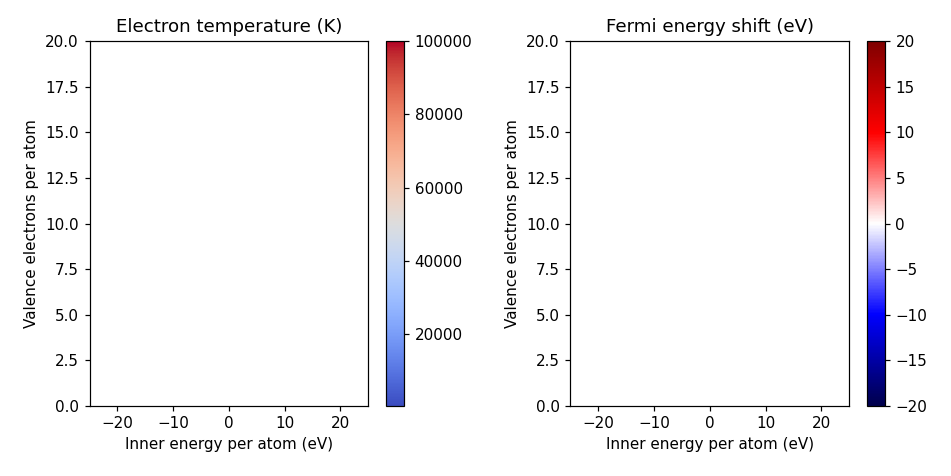

CPU times: user 1min 7s, sys: 607 ms, total: 1min 7s
Wall time: 1min 7s


In [5]:
%%time
sim = XNLdyn.XNLsim(PAR, DEBUG=True, load_tables = False)

PAR.FermiSolver.plot_lookup_tables()

Lookup failed. Trying direct solve for R=8.0 and U=-17.5
Direct solve worked and lead to: T=300.0 and Ef=-0.0


<IPython.core.display.Javascript object>


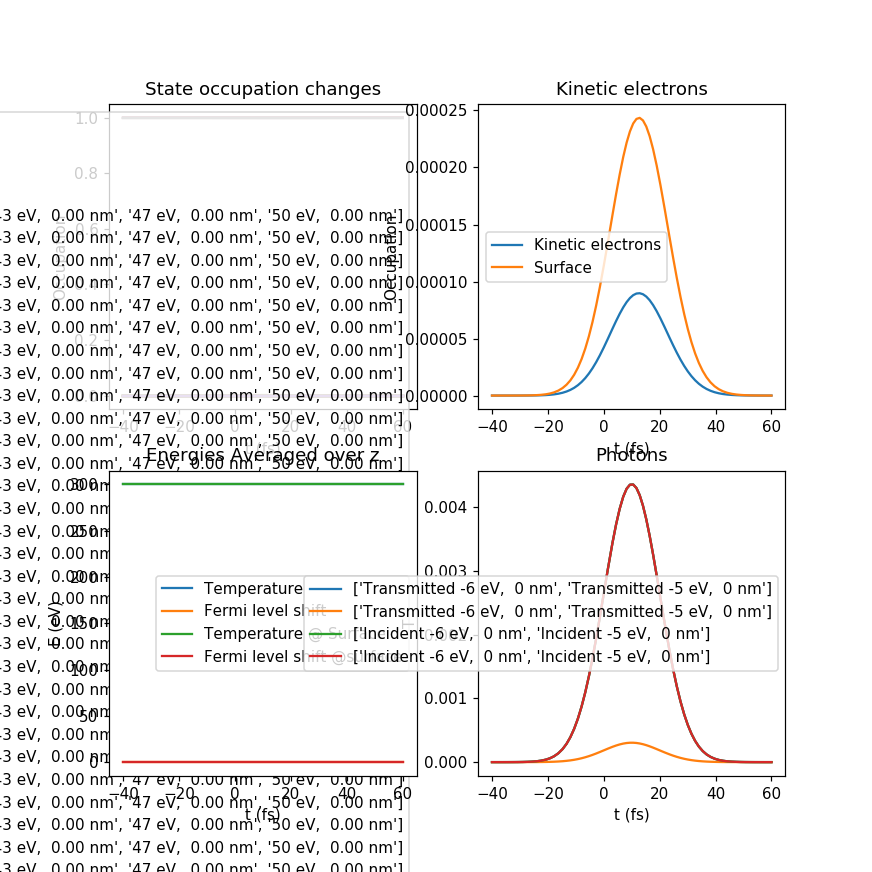

Transmission:  [100.02826067   6.9749434 ]  %


In [10]:
%%time
sim_options = dict(t_span=[-40, 60],method='RK45', rtol=1e-6, atol=1e-8, plot = True, return_full_solution = True)

incident, transmitted, sol = sim.run(**sim_options)

print('Transmission: ', 100 * transmitted/incident, ' %')


<IPython.core.display.Javascript object>


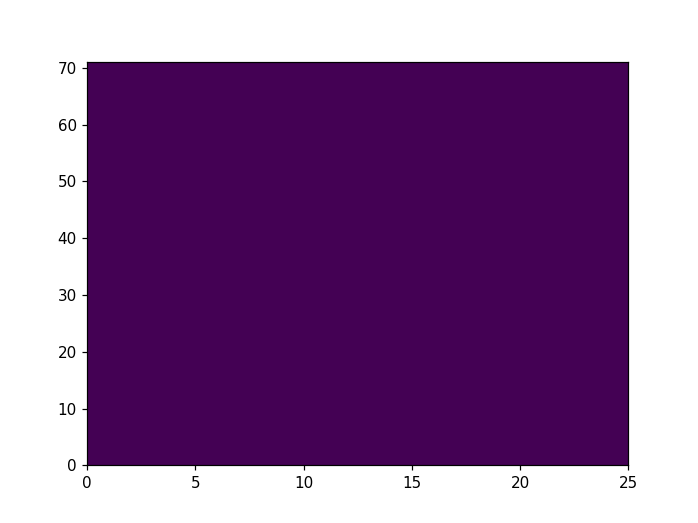

In [16]:
plt.figure()
plt.pcolormesh(sol.temperatures, vmin = 300, vmax = 500)

In [22]:
dir(sol)

['fermi_energies',
 'message',
 'nfev',
 'njev',
 'nlu',
 'sol',
 'status',
 'success',
 't',
 't_events',
 'temperatures',
 'y',
 'y_events']

<IPython.core.display.Javascript object>


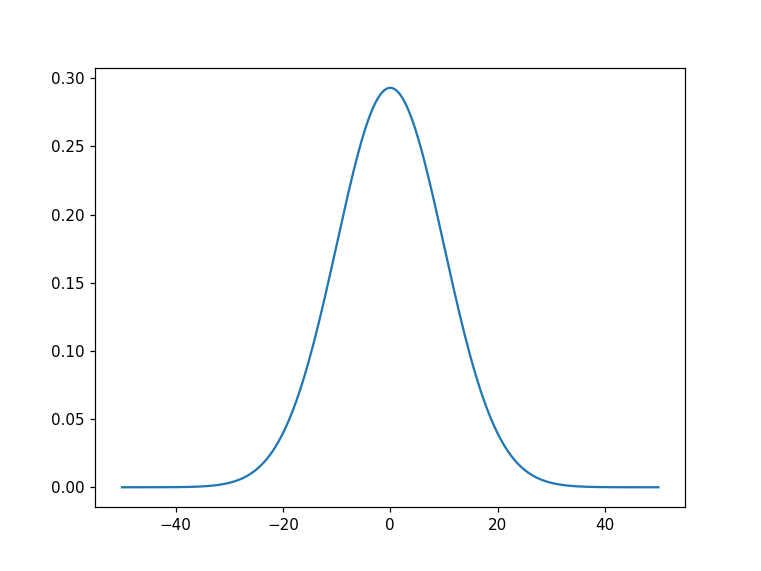

7.342947619617935

In [5]:
t = np.linspace(-50,50,200)
plt.figure()
plt.plot(t,sim.par.pulse_profiles(t))
np.trapz(y= sim.par.pulse_profiles(t),x=t)

In [6]:
a = 1e-8
prec = 1e-8
np.round(a,10)

1e-08

<IPython.core.display.Javascript object>


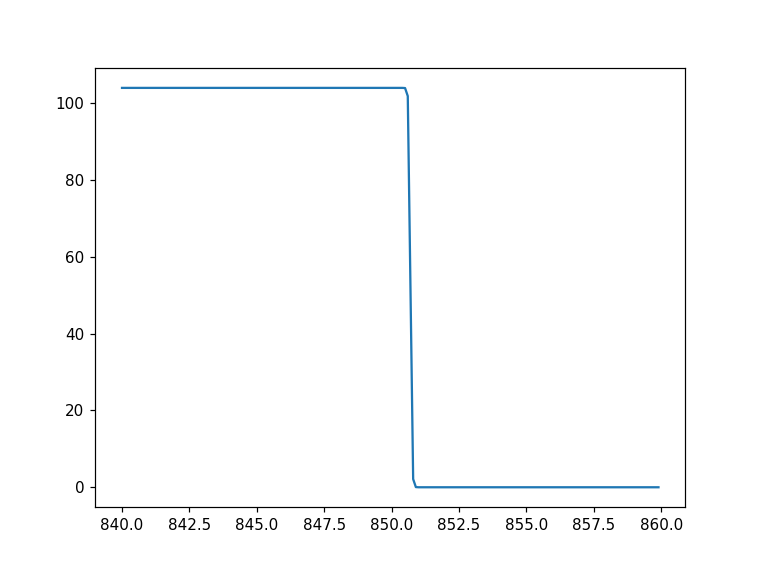

In [9]:
rho_VB  = sim.par.state_vector_0[0, 2]
T       = sim.par.state_vector_0[0, 3] /sim.par.M_VB
enax = np.arange(840, 860, 0.1)
pop =  [sim.fermi(T, rho_VB, E, sim.par.E_f) for E in enax]

plt.figure()
plt.plot(enax, pop)
